### COVID-19
### UPDATE by Weeks 
#### started from officially Day 1 (Wednesday 22.01.2020) given in data set 
### Total infected cases, total fatalities, total recovered

In [1]:
from covid_byweek import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


### Number of covid-19 outbreak days 

In [2]:
rcParams['figure.figsize'] = 20, 6
len(x_dat)

451

In [3]:
updated_date=files[-1].split('.')[0]
updated_date

'04-16-2021'

### Total CONFIRMED cases in the World changed by week


Week: 1 with lowest confirmed cases 2118.0

Week: 47 with highest confirmed cases 5201816.0

Average confirmed by Week until now:  2152791.707692308


,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65
Total Confirmed changed by Week,2118.0,16787.0,40151.0,71226.0,78985.0,88368.0,109820.0,167408.0,337867.0,720010.0,...,108943585.0,111474262.0,114179745.0,116915987.0,119877179.0,123275915.0,127187813.0,131325468.0,136046628.0,139931461.0
Number of Confirmed every Week,2118.0,14669.0,23364.0,31075.0,7759.0,9383.0,21452.0,57588.0,170459.0,382143.0,...,2716972.0,2530677.0,2705483.0,2736242.0,2961192.0,3398736.0,3911898.0,4137655.0,4721160.0,3884833.0


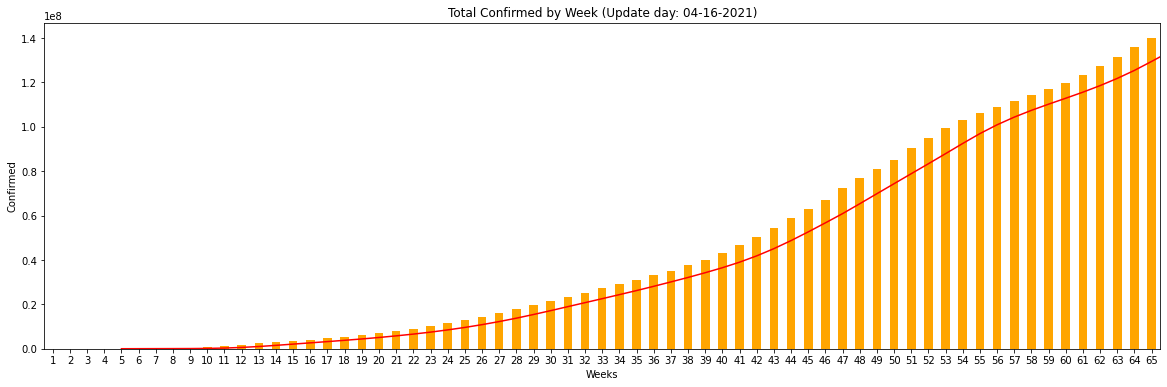

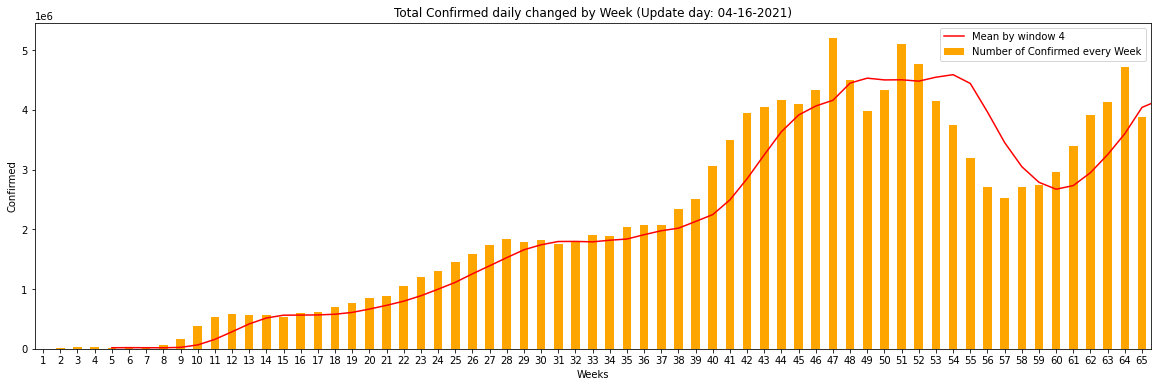

In [4]:
# time slot 4 weeks
window_slot = 4

# convert to DataFrame
x_weeks = [week for week, value in confirmedByWeek]
y_cases_total = [value for week, value in confirmedByWeek]
y_cases_byweek = [confirmedByWeek[0][1]]+[confirmedByWeek[i+1][1]-confirmedByWeek[i][1] for i in range(len(confirmedByWeek)-1)]

weeks = np.arange(1, max(x_weeks)+1, 1)
confirmedweeks = pd.DataFrame(columns=x_weeks, index=['Total Confirmed changed by Week', 'Number of Confirmed every Week'])
for week in weeks:
    confirmedweeks[week] = [y_cases_total[week-1], y_cases_byweek[week-1]]

# Mitigate the negative values by converting all negative values to 0
confirmedweeks.mask(confirmedweeks<0, 0, inplace=True)   

# Plot total confirmed
plt.figure(1)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
# plt.bar(x_weeks, y_cases_total, color='Orange')
confirmedweeks.loc['Total Confirmed changed by Week'].plot.bar(color='orange')

roll = confirmedweeks.loc['Total Confirmed changed by Week'].rolling(window = window_slot)
roll.mean().plot(label='Mean by window '+str(window_slot), color='red')

plt.xlabel('Weeks')
plt.ylabel('Confirmed')
plt.title("Total Confirmed by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalconfirmed.jpg')

# Plot number of confirmed every week
plt.figure(2)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
# plt.bar(x_weeks, y_cases_byweek, color='Orange')
confirmedweeks.loc['Number of Confirmed every Week'].plot.bar(color='orange')

roll = confirmedweeks.loc['Number of Confirmed every Week'].rolling(window = window_slot)
roll.mean().plot(label='Mean by window '+str(window_slot), color='red')

plt.xlabel('Weeks')
plt.ylabel('Confirmed')
plt.title("Total Confirmed daily changed by Week (Update day: "+str(updated_date)+")")
plt.legend()
plt.savefig('output/week_totalconfirmed_weekly.jpg')

print("\nWeek:", np.argmin(y_cases_byweek)+1, "with lowest confirmed cases", y_cases_byweek[np.argmin(y_cases_byweek)])
print("\nWeek:", np.argmax(y_cases_byweek)+1, "with highest confirmed cases", y_cases_byweek[np.argmax(y_cases_byweek)])
print("\nAverage confirmed by Week until now: ", np.mean(y_cases_byweek))
confirmedweeks

# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Total FATALITIES cases in the World changed by week


Week: 1 with lowest Fatalities cases 56.0

Week: 53 with highest Fatalities cases 98923.0

Average Fatalities by Week until now:  46134.10769230769


,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65
Total Fatalities changed by Week,56.0,362.0,906.0,1770.0,2469.0,2996.0,3803.0,6440.0,14632.0,33990.0,...,2402819.0,2468690.0,2532744.0,2594363.0,2654386.0,2716045.0,2784155.0,2853355.0,2936454.0,2998717.0
Number of Fatalities every Week,56.0,306.0,544.0,864.0,699.0,527.0,807.0,2637.0,8192.0,19358.0,...,79315.0,65871.0,64054.0,61619.0,60023.0,61659.0,68110.0,69200.0,83099.0,62263.0


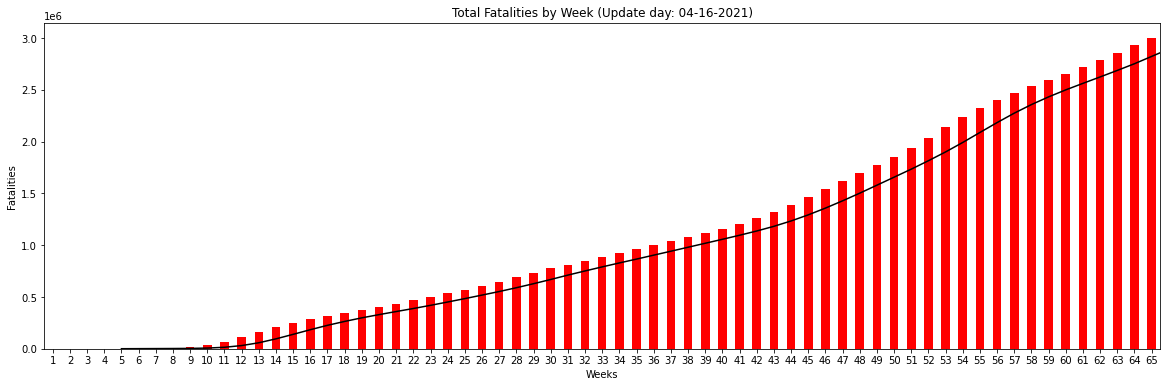

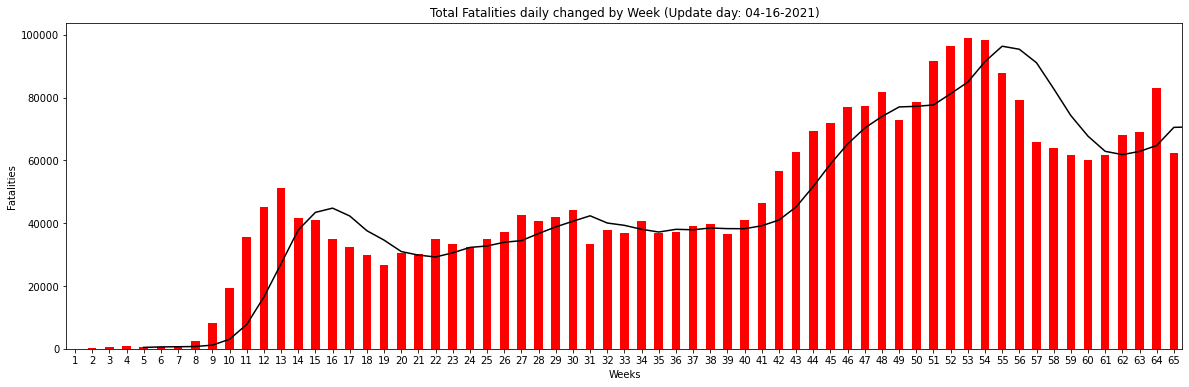

In [8]:
# convert to DataFrame
x_weeks = [week for week, value in deathsByWeek]
y_cases_total_deaths = [value for week, value in deathsByWeek]
y_cases_byweek_deaths = [deathsByWeek[0][1]]+[deathsByWeek[i+1][1]-deathsByWeek[i][1] for i in range(len(deathsByWeek)-1)]

weeks = np.arange(1, max(x_weeks)+1, 1)
confirmedweeks_deaths = pd.DataFrame(columns=x_weeks, index=['Total Fatalities changed by Week', 'Number of Fatalities every Week'])
for week in weeks:
    confirmedweeks_deaths[week] = [y_cases_total_deaths[week-1], y_cases_byweek_deaths[week-1]]

# Mitigate the negative values by converting all negative values to 0
confirmedweeks_deaths.mask(confirmedweeks_deaths<0, 0, inplace=True)        

# Plot total confirmed
plt.figure(1)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
# plt.bar(x_weeks, y_cases_total_deaths, color='Red')
confirmedweeks_deaths.loc['Total Fatalities changed by Week'].plot.bar(color='red')

roll = confirmedweeks_deaths.loc['Total Fatalities changed by Week'].rolling(window = window_slot)
roll.mean().plot(label='Mean by window '+str(window_slot), color='black')

plt.xlabel('Weeks')
plt.ylabel('Fatalities')
plt.title("Total Fatalities by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalfatalities.jpg')

# Plot number of confirmed every week
plt.figure(2)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
# plt.bar(x_weeks, y_cases_byweek_deaths, color='Red')
confirmedweeks_deaths.loc['Number of Fatalities every Week'].plot.bar(color='red')

roll = confirmedweeks_deaths.loc['Number of Fatalities every Week'].rolling(window = window_slot)
roll.mean().plot(label='Mean by window '+str(window_slot), color='black')
    
plt.xlabel('Weeks')
plt.ylabel('Fatalities')
plt.title("Total Fatalities daily changed by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalfatalities_weekly.jpg')

print("\nWeek:", np.argmin(y_cases_byweek_deaths)+1, "with lowest Fatalities cases", y_cases_byweek_deaths[np.argmin(y_cases_byweek_deaths)])
print("\nWeek:", np.argmax(y_cases_byweek_deaths)+1, "with highest Fatalities cases", y_cases_byweek_deaths[np.argmax(y_cases_byweek_deaths)])
print("\nAverage Fatalities by Week until now: ", np.mean(y_cases_byweek_deaths))
confirmedweeks_deaths

# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Total RECOVERED cases in the World changed by week


Week: 59 with lowest Recovered cases -9051971.0

Week: 47 with highest Recovered cases 4149818.0

Average Recovered by Week until now:  1225879.1384615384


,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65
Total Recovered changed by Week,56.0,476.0,3245.0,10866.0,23394.0,42717.0,60695.0,76033.0,97225.0,149062.0,...,72700356.0,74859907.0,75136334.0,66084363.0,67895903.0,69803250.0,72097107.0,74475512.0,77419352.0,79682144.0
Number of Recovered every Week,56.0,420.0,2769.0,7621.0,12528.0,19323.0,17978.0,15338.0,21192.0,51837.0,...,2377383.0,2159551.0,276427.0,0.0,1811540.0,1907347.0,2293857.0,2378405.0,2943840.0,2262792.0


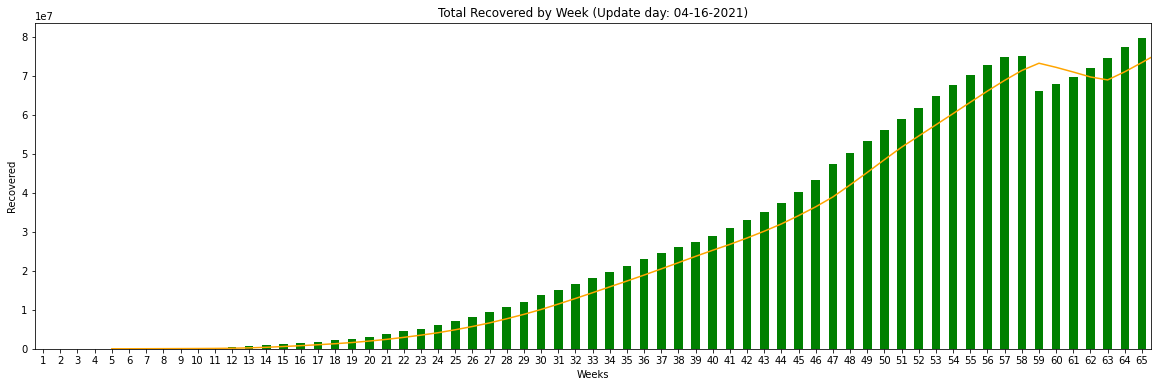

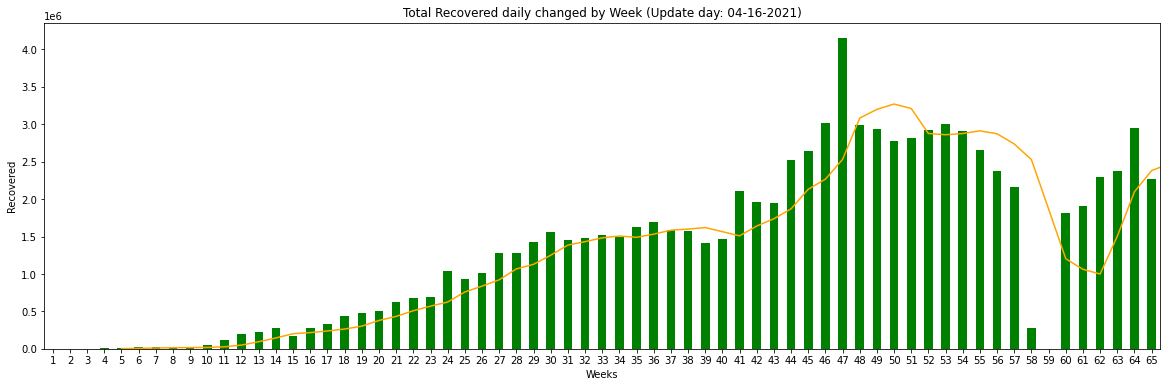

In [6]:
# convert to DataFrame
x_weeks = [week for week, value in recoveredByWeek]
y_cases_total_recovered = [value for week, value in recoveredByWeek]
y_cases_byweek_recovered = [recoveredByWeek[0][1]]+[recoveredByWeek[i+1][1]-recoveredByWeek[i][1] for i in range(len(recoveredByWeek)-1)]

weeks = np.arange(1, max(x_weeks)+1, 1)
confirmedweeks_recovered = pd.DataFrame(columns=x_weeks, index=['Total Recovered changed by Week', 'Number of Recovered every Week'])
for week in weeks:
    confirmedweeks_recovered[week] = [y_cases_total_recovered[week-1], y_cases_byweek_recovered[week-1]]

# Mitigate the negative values by converting all negative values to 0
confirmedweeks_recovered.mask(confirmedweeks_recovered<0, 0, inplace=True)
    
# Plot total recovered
plt.figure(1)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
# plt.bar(x_weeks, y_cases_total_recovered, color='Green')
confirmedweeks_recovered.loc['Total Recovered changed by Week'].plot.bar(color='Green')

roll = confirmedweeks_recovered.loc['Total Recovered changed by Week'].rolling(window = window_slot)
roll.mean().plot(label='Mean by window '+str(window_slot), color='orange')

plt.xlabel('Weeks')
plt.ylabel('Recovered')
plt.title("Total Recovered by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalrecovered.jpg')

# Plot number of recovered every week
plt.figure(2)
plt.xticks(np.arange(0, max(x_weeks)+1, 1))
# plt.bar(x_weeks, y_cases_byweek_recovered, color='Green')
confirmedweeks_recovered.loc['Number of Recovered every Week'].plot.bar(color='Green')

roll = confirmedweeks_recovered.loc['Number of Recovered every Week'].rolling(window = window_slot)
roll.mean().plot(label='Mean by window '+str(window_slot), color='orange')

plt.xlabel('Weeks')
plt.ylabel('Recovered')
plt.title("Total Recovered daily changed by Week (Update day: "+str(updated_date)+")")
plt.savefig('output/week_totalrecovered_weekly.jpg')

print("\nWeek:", np.argmin(y_cases_byweek_recovered)+1, "with lowest Recovered cases", y_cases_byweek_recovered[np.argmin(y_cases_byweek_recovered)])
print("\nWeek:", np.argmax(y_cases_byweek_recovered)+1, "with highest Recovered cases", y_cases_byweek_recovered[np.argmax(y_cases_byweek_recovered)])
print("\nAverage Recovered by Week until now: ", np.mean(y_cases_byweek_recovered))
confirmedweeks_recovered

# note: plot displays data on x-axis start at index 1, and data in Python collected at index 0, that's why +1

### Since 03.2021 there was no recovered data in US. 
### More Information, see: 
### https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports_us
### https://github.com/CSSEGISandData/COVID-19/issues/3464